In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import gmaps
import os
from pprint import pprint
from scipy.stats import linregress
from scipy import stats
import seaborn as sb
from sklearn import preprocessing
from mlxtend.preprocessing import standardize

In [3]:
# Create empty DataFrame
df_type = pd.DataFrame()
df_seatbelt = pd.DataFrame()
df_restraint = pd.DataFrame()
df_phones = pd.DataFrame()

# Read data into pandas

df_raw_type = pd.read_csv("data_raw/summary_table_road_traffic_deathsp.csv")
df_raw_seatbelt = pd.read_csv("data_raw/seat_belt_laws.csv")
df_raw_restraint = pd.read_csv("data_raw/child_restraints_by_country.csv")
df_raw_phones = pd.read_csv("data_raw/mobile_phone_laws.csv")

# Chosen countries
countries = ["Argentina",
             "Australia",
             "Belgium",
             "Canada",
             "Finland",
             "Germany",
             "Greece",
             "Israel",
             "Spain",
             "Sweden",
             "United Kingdom",
             "United States of America"
            ]

# Making loop to fill DataFrames
for x in countries:
    df_type = df_type.append( df_raw_type[df_raw_type['Country/Area'].str.contains(x)], ignore_index = True )
    df_seatbelt = df_seatbelt.append( df_raw_seatbelt[df_raw_seatbelt['Country/Area'].str.contains(x)], ignore_index = True )
    df_restraint = df_restraint.append( df_raw_restraint[df_raw_restraint['Country/Area'].str.contains(x)], ignore_index = True )
    df_phones = df_phones.append( df_raw_phones[df_raw_phones['Country/Area'].str.contains(x)], ignore_index = True )

# Merge DataFrames
df1=pd.merge(df_type,df_seatbelt, how='left', on='Country/Area')
df2=pd.merge(df1,df_restraint, how='left', on='Country/Area')
df=pd.merge(df2,df_phones, how='left', on='Country/Area')

# Rename columns so that they are differentiated
df.rename(columns= {"Country/Area":"country","Population numbers for 2016a":"population","Income levelc":"income","Reported number of road traffic deaths":"number of deaths","Estimated road traffic death rate per 100 000 populationd ":"estimated road death","National seat\nbelt law":"seat belt law","National child restraint law":"child restraint law","Seat belt applies to Drivers":"seat belt drivers","Seat belt applies to Front seat passengers":"seat belt front seat","Seat belt applies to Rear-seat passengers":"seat belt rear seat","Seat-belt wearing rates (%) Drivers only ":"rates seat belt drivers"," Seat-belt wearing rates (%) Front-seat occupants":"rates seat belt front seat","Seat-belt wearing rates (%) Rear-seat occupants":"rates seat belt rear seat","Seat-belt wearing rates (%) All occupants":"rates seat belt all","\nChild restraints required ":"child restraints","Children seated \nin front seat":"child seatedcin front","Standard referred to and/or specified":"standard specified","Percentage of children using child restraints":"percentage child restraints","National mobile phone law":"mobile phone law","Mobile phone law Applies to hand-held phone use":"hand_held phone","Mobile phone law Applies to hands-free phone use":"hand_free phone","Any data on use of mobile phone while driving":"any_data phone"}, inplace=True)

# Collecting columns which will be used in analyzation
df = df[["country","population","income","number of deaths","death estimate","estimated road death","seat belt law","seat belt drivers","seat belt front seat","seat belt rear seat","rates seat belt drivers","rates seat belt front seat","rates seat belt rear seat","rates seat belt all","child restraint law","child restraints","standard specified","child seatedcin front","percentage child restraints","mobile phone law","hand_held phone","hand_free phone","any_data phone"]]
display(df)

,country,population,income,number of deaths,death estimate,estimated road death,seat belt law,seat belt drivers,seat belt front seat,seat belt rear seat,...,rates seat belt all,child restraint law,child restraints,standard specified,child seatedcin front,percentage child restraints,mobile phone law,hand_held phone,hand_free phone,any_data phone
0,Argentina,43847432,Middle,5530,6119,14.0,Yes,Yes,Yes,Yes,...,43.6,Yes,Up to 4 yrs,No,Prohibited under 10 yrs,26.4,Yes,Yes,Yes,Yes
1,Australia,24125848,High,1296,1351,5.6,Yes,Yes,Yes,Yes,...,95,Yes,Up to 7 yrs,Yes,Prohibited under 7 yrs,63,Yes,Yes,No,Yes
2,Belgium,11358379,High,637,657,5.8,Yes,Yes,Yes,Yes,...,91.7,Yes,Up to 18 yrs / 135 cm,Yes,Allowed in a child restraint restraint,89,Yes,Yes,No,Yes
3,Canada,36289824,High,1858,2118,5.8,Yes,Yes,Yes,Yes,...,95.3,Yes,Up to 7 yrs,Yes,Allowed in a child restraint restraint,91,Yes,Yes,No,Yes
4,Finland,5503132,High,252,260,4.7,Yes,Yes,Yes,Yes,...,94,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,97,Yes,Yes,No,Yes
5,Germany,81914672,High,3206,3327,4.1,Yes,Yes,Yes,Yes,...,98,Yes,Up to 12 yrs / 150 cm,Yes,Allowed in a child restraint restraint,97,Yes,Yes,No,Yes
6,Greece,11183716,High,824,1026,9.2,Yes,Yes,Yes,Yes,...,72,Yes,Up to 135 - 150 cm,Yes,Allowed in a child restraint restraint,67,Yes,Yes,No,Yes
7,Israel,8191828,High,335,345,4.2,Yes,Yes,Yes,Yes,...,87.9,Yes,Up to 8 yrs,Yes,Allowed in a child restraint restraint,52,Yes,Yes,No,No
8,Spain,46347576,High,1810,1922,4.1,Yes,Yes,Yes,Yes,...,88.3,Yes,Up to 135 cm,Yes,Prohibited under 135 cm,88,Yes,Yes,No,Yes
9,Sweden,9837533,High,270,278,2.8,Yes,Yes,Yes,Yes,...,97,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,96,Yes,No,No,No


In [4]:
# Create a new DataFrame to show the data of all countries in child-restraints laws
df_new=pd.merge(df_raw_type,df_raw_restraint, how='left', on='Country/Area')

In [5]:
# percentage of child restraints use by countries
(df_raw_restraint.loc[df_raw_restraint["National child restraint law"]=="Yes"].count())/(df_raw_restraint["National child restraint law"].count())*100

Country/Area                                     48.0
National child restraint law                     48.0
\nChild restraints required                      48.0
Standard referred to and/or specified            48.0
Children seated \nin front seat                  48.0
  Enforcement                                    48.0
Percentage of children using child restraints    48.0
dtype: float64

In [6]:
# percentage of child restraints not use by countries
(df_raw_restraint.loc[df_raw_restraint["National child restraint law"]=="No"].count())/(df_raw_restraint["National child restraint law"].count())*100

Country/Area                                     52.0
National child restraint law                     52.0
\nChild restraints required                      52.0
Standard referred to and/or specified            52.0
Children seated \nin front seat                  52.0
  Enforcement                                    52.0
Percentage of children using child restraints    52.0
dtype: float64

In [7]:
# Make a groupby dataframe for child restraint law
child_by_income = df_new.groupby(["Income levelc","National child restraint law"])["National child restraint law"].count()
display(child_by_income)

Income levelc  National child restraint law
High           No                               5
               Yes                             44
Low            No                              23
               Yes                              5
Middle         No                              63
               Yes                             35
Name: National child restraint law, dtype: int64

In [8]:
# Create a new DataFrame to show the data of all countries in seat-belt laws
df_new2=pd.merge(df_raw_type,df_raw_seatbelt, how='left', on='Country/Area')

In [9]:
# percentage of seat-belt law use by countries
(df_raw_seatbelt.loc[df_raw_seatbelt["National seat\nbelt law"]=="Yes"].count())/(df_raw_seatbelt["National seat\nbelt law"].count())*100

Country/Area                                         92.000000
National seat\nbelt law                              92.000000
Seat belt applies to Drivers                         92.000000
Seat belt applies to Front seat passengers           92.000000
Seat belt applies to Rear-seat passengers            92.000000
Seat-belt wearing rates (%) Drivers only             43.428571
 Seat-belt wearing rates (%) Front-seat occupants    42.857143
Seat-belt wearing rates (%) Rear-seat occupants      36.000000
Seat-belt wearing rates (%) All occupants            29.142857
dtype: float64

In [10]:
# percentage of seat-belt law not use by countries
(df_raw_seatbelt.loc[df_raw_seatbelt["National seat\nbelt law"]=="No"].count())/(df_raw_seatbelt["National seat\nbelt law"].count())*100

Country/Area                                         8.000000
National seat\nbelt law                              8.000000
Seat belt applies to Drivers                         8.000000
Seat belt applies to Front seat passengers           8.000000
Seat belt applies to Rear-seat passengers            8.000000
Seat-belt wearing rates (%) Drivers only             0.571429
 Seat-belt wearing rates (%) Front-seat occupants    0.571429
Seat-belt wearing rates (%) Rear-seat occupants      0.571429
Seat-belt wearing rates (%) All occupants            0.571429
dtype: float64

In [11]:
# Make a groupby dataframe for seat-belt law
seatbelt_by_income = df_new2.groupby(["Income levelc","National seat\nbelt law"])["National seat\nbelt law"].count()
display(seatbelt_by_income)

Income levelc  National seat\nbelt law
High           No                          2
               Yes                        47
Low            No                          7
               Yes                        21
Middle         No                          5
               Yes                        93
Name: National seat\nbelt law, dtype: int64

In [12]:
# Create a new DataFrame to show the data of all countries in mobile phone laws
df_new3=pd.merge(df_raw_type,df_raw_phones, how='left', on='Country/Area')

In [13]:
# percentage of mobile phone law use by countries
(df_raw_phones.loc[df_raw_phones["National mobile phone law"]=="Yes"].count())/(df_raw_phones["National mobile phone law"].count())*100

Country/Area                                        85.714286
National mobile phone law                           85.714286
Mobile phone law Applies to hand-held phone use     85.714286
Mobile phone law Applies to hands-free phone use    85.714286
Any data on use of mobile phone while driving       85.714286
dtype: float64

In [14]:
# percentage of mobile phone law use by countries
(df_raw_phones.loc[df_raw_phones["National mobile phone law"]=="No"].count())/(df_raw_phones["National mobile phone law"].count())*100

Country/Area                                        14.285714
National mobile phone law                           14.285714
Mobile phone law Applies to hand-held phone use     14.285714
Mobile phone law Applies to hands-free phone use    14.285714
Any data on use of mobile phone while driving       14.285714
dtype: float64

In [15]:
# Make a groupby dataframe for mobile phone law
mobile_by_income = df_new3.groupby(["Income levelc","National mobile phone law"])["National mobile phone law"].count()
display(mobile_by_income)

Income levelc  National mobile phone law
High           No                            2
               Yes                          47
Low            No                            9
               Yes                          19
Middle         No                           14
               Yes                          84
Name: National mobile phone law, dtype: int64

In [16]:
# Convert type of my data from object to float
df["percentage child restraints"] = pd.to_numeric(df["percentage child restraints"])
df["rates seat belt drivers"] = pd.to_numeric(df["rates seat belt drivers"])
df["rates seat belt front seat"] = pd.to_numeric(df["rates seat belt front seat"])
df["rates seat belt rear seat"] = pd.to_numeric(df["rates seat belt rear seat"])
df["rates seat belt all"] = pd.to_numeric(df["rates seat belt all"])

In [17]:
# General information about data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      12 non-null     object 
 1   population                   12 non-null     int64  
 2   income                       12 non-null     object 
 3   number of deaths             12 non-null     int64  
 4   death estimate               12 non-null     int64  
 5   estimated road death         12 non-null     float64
 6   seat belt law                12 non-null     object 
 7   seat belt drivers            12 non-null     object 
 8   seat belt front seat         12 non-null     object 
 9   seat belt rear seat          12 non-null     object 
 10  rates seat belt drivers      12 non-null     float64
 11  rates seat belt front seat   12 non-null     float64
 12  rates seat belt rear seat    12 non-null     float64
 13  rates seat belt all   

In [18]:
# Basic descriptive statistics for each column
df.describe()

,population,number of deaths,death estimate,estimated road death,rates seat belt drivers,rates seat belt front seat,rates seat belt rear seat,rates seat belt all,percentage child restraints
count,1.200000e+01,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.554734e+07,4409.500000,4942.50000,6.316667,89.033333,87.625000,75.491667,87.491667,79.200000
std,8.750570e+07,9779.287885,11128.39841,3.631136,13.458173,16.047607,25.819459,15.499998,22.387659
min,5.503132e+06,252.000000,260.00000,2.800000,50.200000,40.800000,23.000000,43.600000,26.400000
25%,1.084717e+07,561.500000,579.00000,4.100000,90.450000,89.750000,73.525000,88.200000,66.000000
50%,3.020784e+07,1550.000000,1636.50000,5.150000,93.250000,93.100000,85.250000,92.850000,89.000000
75%,5.120782e+07,2195.000000,2420.25000,6.650000,95.775000,95.400000,90.000000,95.725000,95.250000
max,3.221796e+08,35092.000000,39888.00000,14.000000,98.000000,98.000000,99.000000,98.000000,97.000000


In [19]:
# Create a new DataFrame
child_restraints = df[["population","number of deaths","estimated road death","percentage child restraints"]]

# Standardized Created DataFrame 
standardize(child_restraints, columns=['population', 'percentage child restraints','estimated road death','number of deaths'])

,population,percentage child restraints,estimated road death,number of deaths
0,-0.139650,-2.463313,2.210046,0.119674
1,-0.375046,-0.755789,-0.206143,-0.332534
2,-0.527438,0.457206,-0.148615,-0.402918
3,-0.229857,0.550513,-0.148615,-0.272510
4,-0.597327,0.830435,-0.465021,-0.444037
5,0.314720,0.830435,-0.637606,-0.128538
6,-0.529523,-0.569174,0.829367,-0.382945
7,-0.565234,-1.268979,-0.608841,-0.435172
8,-0.109808,0.410552,-0.637606,-0.277637
9,-0.545591,0.783781,-1.011540,-0.442115


In [ ]:
# PiePlot to calculate population by income
plt.figure(figsize=(6,6))
colors = ["burlywood", "olive", "orangered"]
income = df_raw_type.groupby("Income levelc")["Population numbers for 2016a"].sum()
count_chart = income.plot(kind='pie',colors=colors,explode = (0.1, 0, 0), autopct="%1.1f%%" , shadow=True, startangle=140)
plt.title("Calculate Population by Income")
plt.axis("equal")
plt.savefig("piechart_populationbyincome.png")
plt.show()

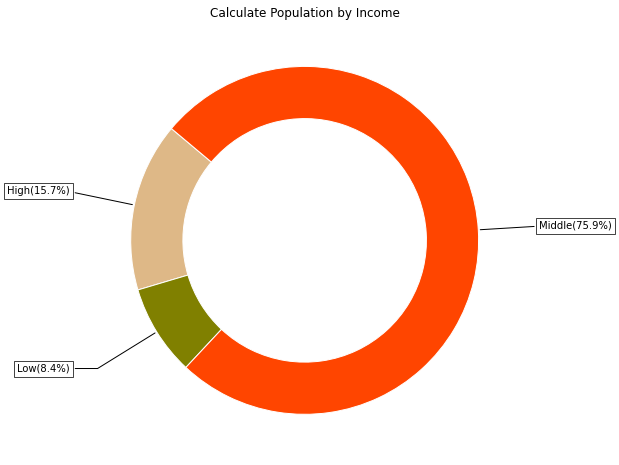

In [20]:
# DounutPlot to calculate population by income
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

recipe = ["High(15.7%)",
          "Low(8.4%)",
          "Middle(75.9%)",
          ]

data = df_raw_type.groupby("Income levelc")["Population numbers for 2016a"].sum()
colors = ["burlywood", "olive", "orangered"]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=140,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
plt.setp( wedges, width=0.3, edgecolor='white')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Calculate Population by Income",fontsize=12)
plt.savefig("output_data/piechart_populationbyincome.png")
plt.show()

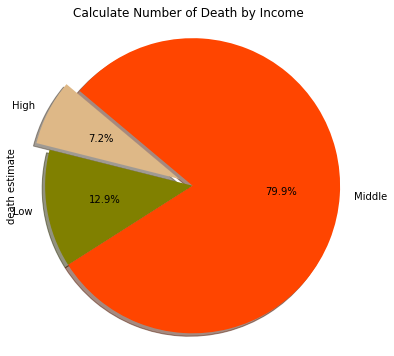

In [22]:
# PiePlot to calculate number of death by income
plt.figure(figsize=(6,6))
colors = ["burlywood", "olive", "orangered"]
income = df_raw_type.groupby("Income levelc")["death estimate"].sum()
count_chart = income.plot(kind='pie',colors=colors,explode = (0.1, 0, 0), autopct="%1.1f%%" , shadow=True, startangle=140)
plt.title("Calculate Number of Death by Income")
plt.axis("equal")
plt.savefig("piechart_deathsbyincome.png")
plt.show()

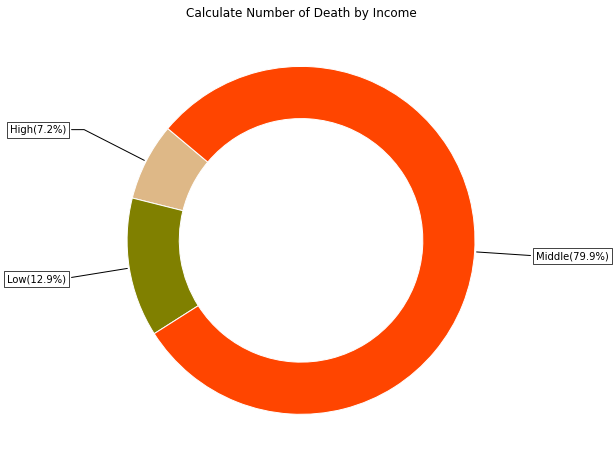

In [23]:
# DounutPlot to calculate number of death by income
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

recipe = ["High(7.2%)",
          "Low(12.9%)",
          "Middle(79.9%)",
          ]

data = df_raw_type.groupby("Income levelc")["death estimate"].sum()
colors = ["burlywood", "olive", "orangered"]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=140,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
plt.setp( wedges, width=0.3, edgecolor='white')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Calculate Number of Death by Income",fontsize=12)
plt.savefig("output_data/piechart_deathsbyincome.png")
plt.show()

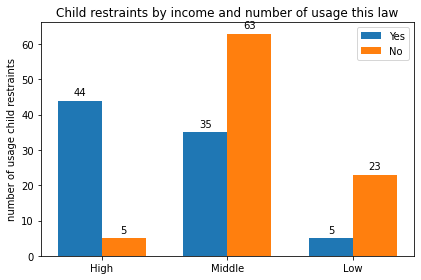

In [24]:
# Bar chart to present income levels and child restraints
labels = ['High', 'Middle', 'Low']
yes = [44, 35, 5]
no = [5, 63, 23]

# the label locations
x = np.arange(len(labels))  

# the width of the bars
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes, width, label='Yes')
rects2 = ax.bar(x + width/2, no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of usage child restraints')
ax.set_title('Child restraints by income and number of usage this law')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("output_data/child_restraints_income.png")
plt.show()

The r-squared is: 0.3392767927058605


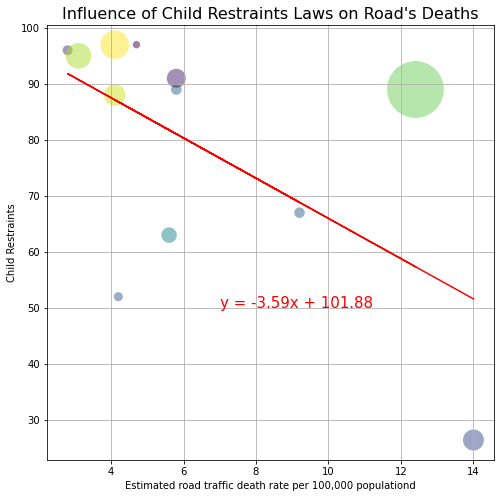

In [25]:
# Plot child restraints versus number of deaths on a scatterplot
colors = np.random.rand(12)
plt.figure(figsize=(8,8))

n = 12
x_values=child_restraints["estimated road death"]
y_values=child_restraints["percentage child restraints"]

scale = child_restraints["population"]/100000
plt.scatter(x_values, y_values, c=colors,s=scale,alpha=0.5, edgecolors='none')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,50),fontsize=15,color="red")

# Give our chart some labels and a tile 
plt.title("Influence of Child Restraints Laws on Road's Deaths", fontsize=16)
plt.xlabel("Estimated road traffic death rate per 100,000 populationd")
plt.ylabel("Child Restraints")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/child_restraints_laws.png")
plt.grid()
plt.show()

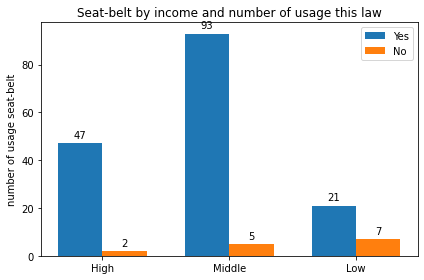

In [26]:
# Bar chart to present income levels and child restraints
labels = ['High', 'Middle', 'Low']
yes = [47, 93, 21]
no = [2, 5, 7]

# the label locations
x = np.arange(len(labels))  

# the width of the bars
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes, width, label='Yes')
rects2 = ax.bar(x + width/2, no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of usage seat-belt')
ax.set_title('Seat-belt by income and number of usage this law')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("output_data/seatbelt_income.png")
plt.show()

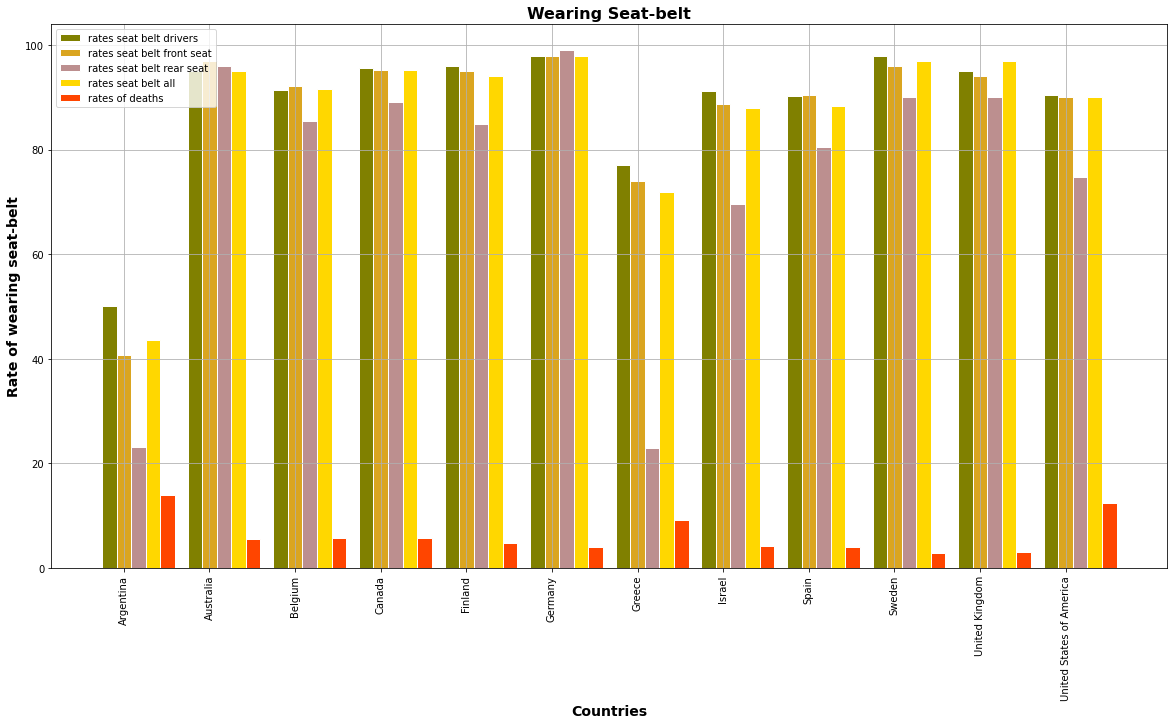

In [27]:
# set width of bar and size of plot
barWidth = 0.17
plt.figure(figsize=(20,10))

# set height of bar
bars1 = df["rates seat belt drivers"]
bars2 = df["rates seat belt front seat"]
bars3 = df["rates seat belt rear seat"]
bars4 = df["rates seat belt all"]
bars5 = child_restraints["estimated road death"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='olive', width=barWidth, edgecolor='white', label='rates seat belt drivers')
plt.bar(r2, bars2, color='goldenrod', width=barWidth, edgecolor='white', label='rates seat belt front seat')
plt.bar(r3, bars3, color='rosybrown', width=barWidth, edgecolor='white', label='rates seat belt rear seat')
plt.bar(r4, bars4, color='gold', width=barWidth, edgecolor='white', label='rates seat belt all')
plt.bar(r5, bars5, color='orangered', width=barWidth, edgecolor='white', label='rates of deaths')
 
# Give our chart some labels and a tile 
plt.title('Wearing Seat-belt', fontsize='16', fontweight='bold')
plt.xlabel('Countries', fontsize='14', fontweight='bold')
plt.ylabel('Rate of wearing seat-belt',fontsize='14', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], df["country"], rotation=90)

# Create legend & Show graphic
plt.grid()
plt.legend(loc="best")
plt.savefig("output_data/wearing_seat_belt.png")
plt.show()


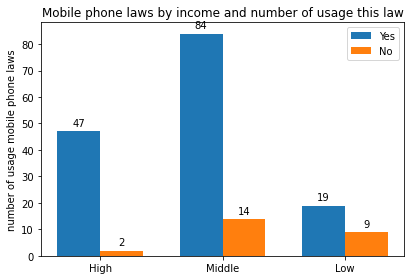

In [28]:
# Bar chart to present income levels and mobile phone laws
labels = ['High', 'Middle', 'Low']
yes = [47, 84, 19]
no = [2, 14, 9]

# the label locations
x = np.arange(len(labels))  

# the width of the bars
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes, width, label='Yes')
rects2 = ax.bar(x + width/2, no, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of usage mobile phone laws')
ax.set_title('Mobile phone laws by income and number of usage this law')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("output_data/mobile_income.png")
plt.show()

In [29]:
# Make a groupby dataframe for hand-hold law
detail_mobile_by_income1 = df_new3.groupby(["Income levelc","Mobile phone law Applies to hand-held phone use"])["Mobile phone law Applies to hand-held phone use"].count()
display(detail_mobile_by_income1)

Income levelc  Mobile phone law Applies to hand-held phone use
High           No                                                  4
               Yes                                                45
Low            No                                                  9
               Yes                                                19
Middle         No                                                 17
               Yes                                                81
Name: Mobile phone law Applies to hand-held phone use, dtype: int64

In [30]:
# Make a groupby dataframe for hand free law
detail_mobile_by_income2 = df_new3.groupby(["Income levelc","Mobile phone law Applies to hands-free phone use"])["Mobile phone law Applies to hands-free phone use"].count()
display(detail_mobile_by_income2)

Income levelc  Mobile phone law Applies to hands-free phone use
High           No                                                  49
Low            No                                                  20
               Yes                                                  8
Middle         No                                                  71
               Yes                                                 27
Name: Mobile phone law Applies to hands-free phone use, dtype: int64

In [31]:
# Make a groupby dataframe for any used law
detail_mobile_by_income3 = df_new3.groupby(["Income levelc","Any data on use of mobile phone while driving"])["Any data on use of mobile phone while driving"].count()
display(detail_mobile_by_income3)

Income levelc  Any data on use of mobile phone while driving
High           No                                               15
               Yes                                              34
Low            No                                               23
               Yes                                               5
Middle         No                                               52
               Yes                                              46
Name: Any data on use of mobile phone while driving, dtype: int64

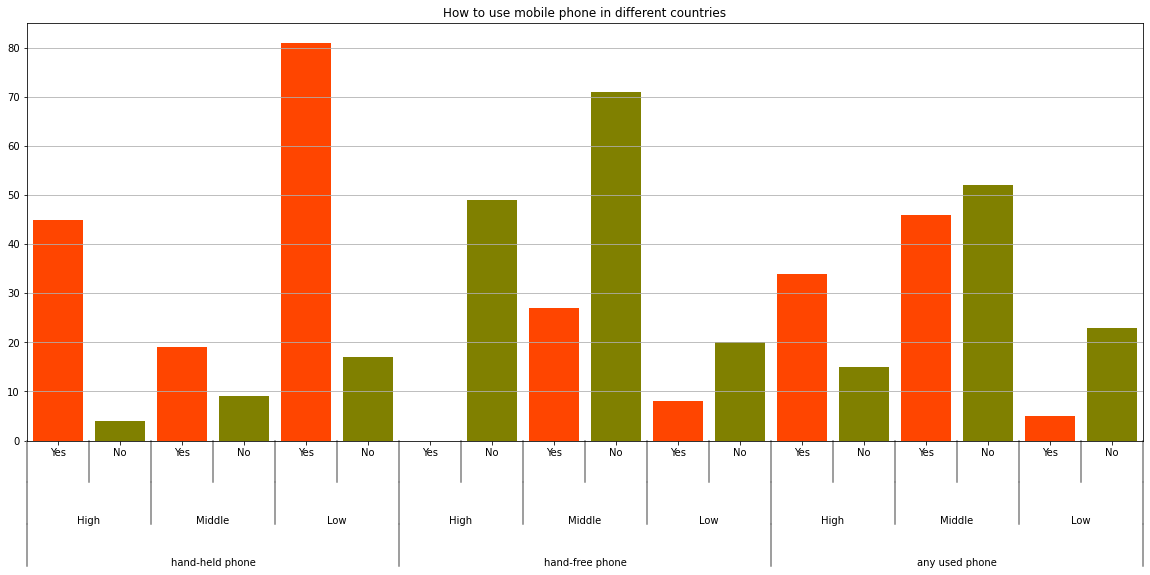

In [32]:
# Grouped barplot
def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='grey')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)
    ax.set_title('How to use mobile phone in different countries')
    ax.bar(xticks, y, align='center',color=["orangered","olive"])
    ax.set_xticks(xticks)

    ax.set_xticklabels(x)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in range(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1

if __name__ == '__main__':
    data = {'hand-held phone':
               {'High':
                   {'Yes': 45,
                    'No': 4},
                'Middle':
                   {'Yes': 19,
                    'No': 9},
                'Low':
                   {'Yes': 81,
                    'No': 17}
               },
            'hand-free phone':
               {'High':
                   {'Yes': 0,
                    'No': 49},
                'Middle':
                   {'Yes': 27,
                    'No': 71},
                'Low':
                   {'Yes': 8,
                    'No': 20}
               },
            'any used phone':
               {'High':
                   {'Yes': 34,
                    'No': 15},
                'Middle':
                   {'Yes': 46,
                    'No': 52},
                'Low':
                   {'Yes': 5,
                    'No': 23}
               }
            
           }
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(1,1,1)
    label_group_bar(ax, data)
    fig.subplots_adjust(bottom=0.3)
    fig.savefig('output_data/use_mobile_phone.png')